# 1. Importing and preparing packages and datasets

In [2]:
# Importing packages 

import pandas as pd
import numpy as np 
import matplotlib as plt

## 1.1. Importing Datasets

### Inbalanced dataset

In [3]:
inb_data = pd.read_csv("merged_data_final.csv")

In [4]:
inb_data

,Temp,Humidity,Precip,Snowdepth,Windgust,Windspeed,Winddir,Sealevelpressure,Cloudcover,Solarradiation,Outage
0,-2.8,99.03,0.0,18.67,0.0,13.1,300.0,1008.5,30.5,0.0,0
1,-2.3,97.63,0.0,18.83,0.0,11.9,332.0,1008.4,11.7,0.0,0
2,0.1,99.62,0.0,19.00,0.0,12.6,353.0,1008.0,87.7,0.0,0
3,-0.2,98.26,0.0,19.17,0.0,10.4,16.0,1008.0,88.7,0.0,0
4,-1.0,98.19,0.0,19.33,0.0,9.7,288.0,1007.8,12.1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
122188,-1.0,93.31,0.0,0.10,9.9,6.7,8.0,1008.8,2.6,0.0,0
122189,-1.2,94.79,0.0,0.10,8.7,5.5,9.0,1009.1,1.7,0.0,0
122190,-1.7,94.18,0.0,0.10,8.5,5.4,359.0,1009.3,0.8,0.0,0
122191,-2.0,94.93,0.0,0.10,5.4,2.8,357.0,1009.3,2.6,0.0,0


In [5]:
inb_data["Outage"].value_counts()

Outage
0    120034
1      2159
Name: count, dtype: int64

### Defining features and target  

In [6]:
# Imbalanced data
Xinb = inb_data.drop('Outage', axis=1)  # features
yinb = inb_data['Outage']               # target variable

### Balanced data (SMOTE, already stratified)

In [7]:
Xbal = pd.read_csv("X_smote.csv")

In [8]:
ybal = pd.read_csv("y_smote.csv")
ybal = ybal["Outage"]

In [9]:
print(ybal)

0         0
1         0
2         0
3         0
4         0
         ..
240063    1
240064    1
240065    1
240066    1
240067    1
Name: Outage, Length: 240068, dtype: int64


### PCA data 

In [10]:
X_pca = pd.read_csv("X_pca.csv")

## 1.2 Splitting the data (with stratification) 

In [11]:
# Splitting the dataset into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split

In [12]:
# Imbalanced dataset
Xinb_train, Xinb_test, yinb_train, yinb_test = train_test_split(Xinb, yinb, test_size=0.3, random_state=42, stratify = yinb)
Xinb_train.shape, Xinb_test.shape, yinb_train.shape, yinb_test.shape

((85535, 10), (36658, 10), (85535,), (36658,))

In [13]:
# Balanced dataset
Xbal_train, Xbal_test, ybal_train, ybal_test = train_test_split(Xbal, ybal, test_size=0.3, random_state=42, stratify = ybal)
Xbal_train.shape, Xbal_test.shape, ybal_train.shape, ybal_test.shape

((168047, 10), (72021, 10), (168047,), (72021,))

In [14]:
# PCA dataset
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, ybal, test_size=0.3, random_state=42, stratify = ybal)
Xpca_train.shape, Xpca_test.shape, ypca_train.shape, ypca_test.shape

((168047, 3), (72021, 3), (168047,), (72021,))

In [15]:
yinb_train.value_counts( normalize= True)*100

Outage
0    98.233472
1     1.766528
Name: proportion, dtype: float64

In [16]:
yinb_train.value_counts( normalize= True)*100

Outage
0    98.233472
1     1.766528
Name: proportion, dtype: float64

In [17]:
yinb_test.value_counts( normalize= True)*100

Outage
0    98.232309
1     1.767691
Name: proportion, dtype: float64

In [18]:
ybal_train.value_counts( normalize= True)*100

Outage
1    50.000298
0    49.999702
Name: proportion, dtype: float64

In [19]:
ybal_test.value_counts( normalize= True)*100

Outage
0    50.000694
1    49.999306
Name: proportion, dtype: float64

## 1.2. Normalisation 

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()

# Normalizing the imbalanced dataset
Xinb_train = scaler.fit_transform(Xinb_train)
Xinb_test = scaler.transform(Xinb_test)

# Normalizing the balanced dataset
Xbal_train = scaler.fit_transform(Xbal_train)
Xbal_test = scaler.transform(Xbal_test)

In [21]:
print(Xinb_train)

[[-0.86271351  0.42825517 -0.13417728 ...  1.13618208  0.78972119
  -0.60719059]
 [-1.59064878  1.3416202  -0.13804186 ...  1.20894712  0.47773198
  -0.21317143]
 [ 0.2291894  -0.18511669 -0.13804186 ...  0.14172657  0.48397176
   0.61001905]
 ...
 [-0.38955558 -2.00318552 -0.13804186 ...  1.58894231 -0.87942106
   1.85870825]
 [-0.13477823  0.06999561  0.58720925 ... -1.70165436  0.48709166
  -0.60719059]
 [ 0.2291894   0.77785351 -0.13804186 ...  0.44895673  0.77412173
  -0.49229019]]


In [22]:
print(Xbal_train)

[[ 0.75286736 -0.2150493  -0.19423857 ...  0.40676172 -1.16426432
  -0.13023065]
 [ 3.0262946  -1.65383071 -0.19423857 ...  0.32729902 -1.00692596
   1.2331814 ]
 [ 0.77783395 -0.06938357  0.1091645  ...  0.36845751 -0.568725
   1.75762807]
 ...
 [ 1.26292004 -0.17456092 -0.19423857 ...  0.21079481 -0.35862005
  -0.09627791]
 [-0.53163215  0.57838702  5.20079321 ... -1.26426489  0.76164193
  -0.61089113]
 [-0.53163215 -0.01416378 -0.19423857 ... -1.66504371  0.44109592
  -0.61089113]]


# 1. Normal logistic regression 

## 1.1 On inbalanced dataset

### Modeling with grid search for optimal parameters

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score

gmean = make_scorer(geometric_mean_score)

## Creating a dictionary with hyperparameters and possible values
## for searching
tuned_parameters = [{"C": [0.001, 0.01, 0.1, 1, 10, 100],
                     "solver": ["sag", "liblinear"],
                     "penalty": ["l1", "l2"],
                     "random_state": [42],
                     "max_iter":[10000]}]
## Configuring grid search
clf1 = GridSearchCV( LogisticRegression(),tuned_parameters,cv=5,scoring=gmean)
## fit the search with training set
clf1.fit(Xinb_train, yinb_train)

C:\Users\komen\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\komen\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\komen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\komen\anaconda3\Lib\site-packages\sklearn\linear_model\_l

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [10000], 'penalty': ['l1', 'l2'],
                          'random_state': [42],
                          'solver': ['sag', 'liblinear']}],
             scoring=make_scorer(geometric_mean_score))

In [24]:
# Saving the model
import joblib
#joblib.dump(clf1, "nlr_on_inb_data.joblib")
clf1 = joblib.load("nlr_on_inb_data.joblib")

In [25]:
clf1.best_params_

{'C': 1,
 'max_iter': 10000,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear'}

In [26]:
clf1.best_score_

0.132812359345459

In [27]:
best_inb_model = clf1.best_estimator_

### Evaluation on imbalanced data

In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# This tells us what is the baseline value. A random classifier would still have an enormous score with this model 
f1_score(yinb_test, np.zeros_like(yinb_test)), roc_auc_score(yinb_test, np.zeros_like(yinb_test))

(0.0, 0.5)

In [29]:
# Predicting on the imbalanced test set
yinb_pred1 = best_inb_model.predict(Xinb_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(yinb_test, yinb_pred1)
print(conf_matrix)

[[36010     0]
 [  632    16]]


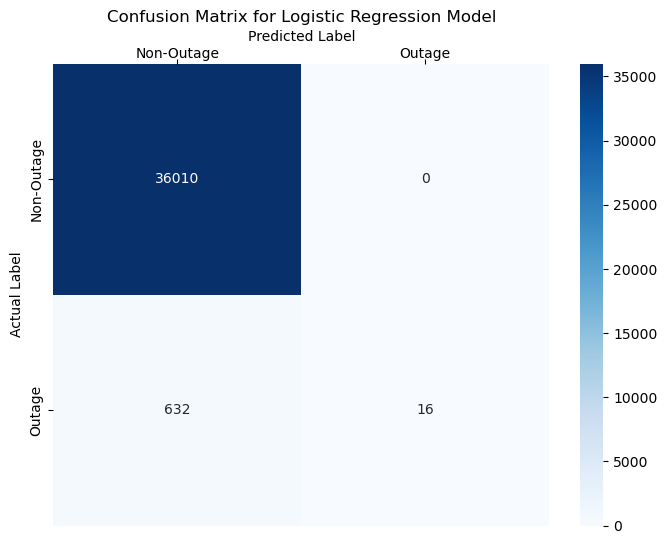

In [31]:

import seaborn as sns
import matplotlib.pyplot as plt


# Creating the confusion matrix with xticklabels on the top
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Outage', 'Outage'])
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Outage', 'Outage'], va='center', rotation=0)
# Placing the 'Non-Churn' and 'Churn' labels on the top
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Non-Outage', 'Outage'])

plt.show()


In [32]:
print (classification_report(yinb_test,yinb_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     36010
           1       1.00      0.02      0.05       648

    accuracy                           0.98     36658
   macro avg       0.99      0.51      0.52     36658
weighted avg       0.98      0.98      0.97     36658



In [35]:
geometric_mean_score(yinb_test,yinb_pred1)

0.15713484026367722

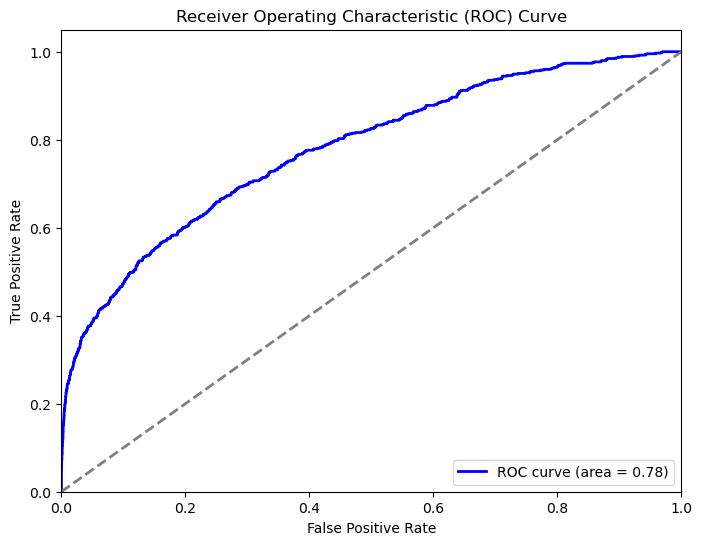

In [37]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(yinb_test, best_inb_model.predict_proba(Xinb_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Evaluation on balanced data

In [38]:
# Predicting on the balanced test set
yinb_pred2 = best_inb_model.predict(Xbal_test)

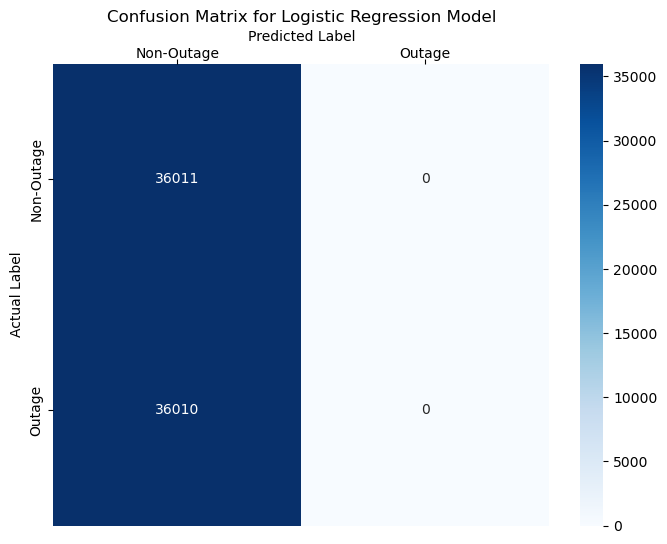

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ybal_test, yinb_pred2)

# Creating the confusion matrix with xticklabels on the top
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Outage', 'Outage'])
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Outage', 'Outage'], va='center', rotation=0)
# Placing the 'Non-Churn' and 'Churn' labels on the top
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Non-Outage', 'Outage'])

plt.show()


In [40]:
# This score shows that the model was actually very bad 
print (classification_report(ybal_test,yinb_pred2))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     36011
           1       0.00      0.00      0.00     36010

    accuracy                           0.50     72021
   macro avg       0.25      0.50      0.33     72021
weighted avg       0.25      0.50      0.33     72021



C:\Users\komen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\komen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\komen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


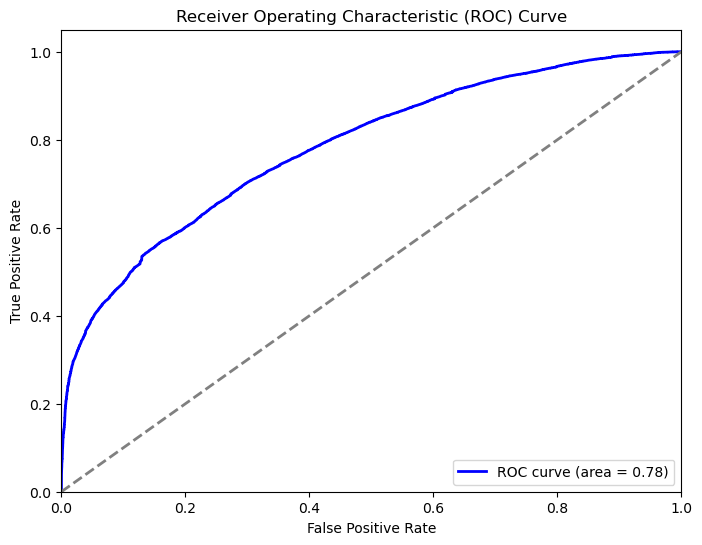

In [41]:
from sklearn.metrics import roc_curve, auc

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ybal_test, best_inb_model.predict_proba(Xbal_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [81]:
geometric_mean_score(yinb_test,yinb_pred2)

0.0

# 1.2. On balanced dataset (SMOTE)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Creating a dictionary with hyperparameters and possible values
## for searching
tuned_parameters = [{"C": [0.01, 0.1, 1],
                     "solver": ["sag"],
                     "max_iter":[50000]}]
## Configuring grid search
clf2 = GridSearchCV(LogisticRegression(),tuned_parameters,cv=5,scoring="roc_auc")
## fit the search with training set
clf2.fit(Xbal_train, ybal_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1], 'max_iter': [50000],
                          'solver': ['sag']}],
             scoring='roc_auc')

In [24]:
# Saving the model
import joblib
joblib.dump(clf2, "nlr_on_bal_data.joblib")

['nlr_on_bal_data.joblib']

In [25]:
clf2.best_params_

{'C': 1, 'max_iter': 50000, 'solver': 'sag'}

In [26]:
best_bal_model = clf2.best_estimator_

In [27]:
clf2.best_score_

0.7851680472985677

### Evaluation on imbalanced data

In [28]:
# Predicting on the imbalanced test set
ybal_pred2 = best_bal_model.predict(Xinb_test)

In [402]:
from sklearn.metrics import classification_report, confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(yinb_test, ybal_pred2)
print(conf_matrix)

[[20620 15343]
 [  129   471]]


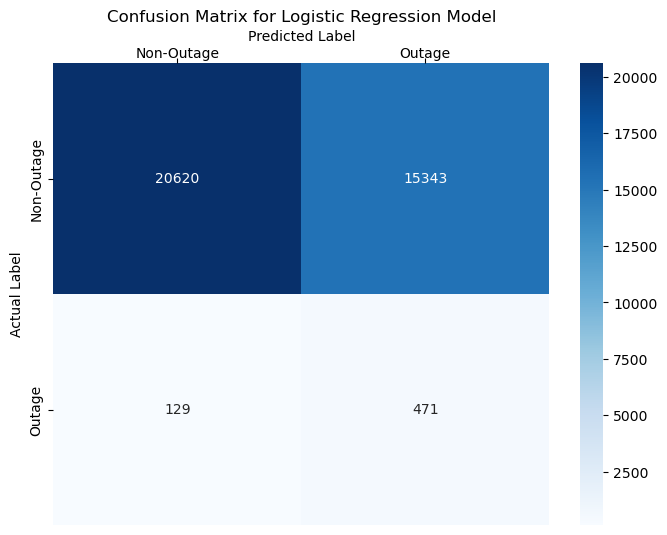

In [403]:

import seaborn as sns
import matplotlib.pyplot as plt


# Creating the confusion matrix with xticklabels on the top
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Outage', 'Outage'])
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Outage', 'Outage'], va='center', rotation=0)
# Placing the 'Non-Churn' and 'Churn' labels on the top
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Non-Outage', 'Outage'])

plt.show()


In [30]:
from sklearn.metrics import classification_report
print (classification_report(yinb_test,ybal_pred2))

              precision    recall  f1-score   support

           0       0.99      0.57      0.72     36010
           1       0.03      0.79      0.06       648

    accuracy                           0.57     36658
   macro avg       0.51      0.68      0.39     36658
weighted avg       0.98      0.57      0.71     36658



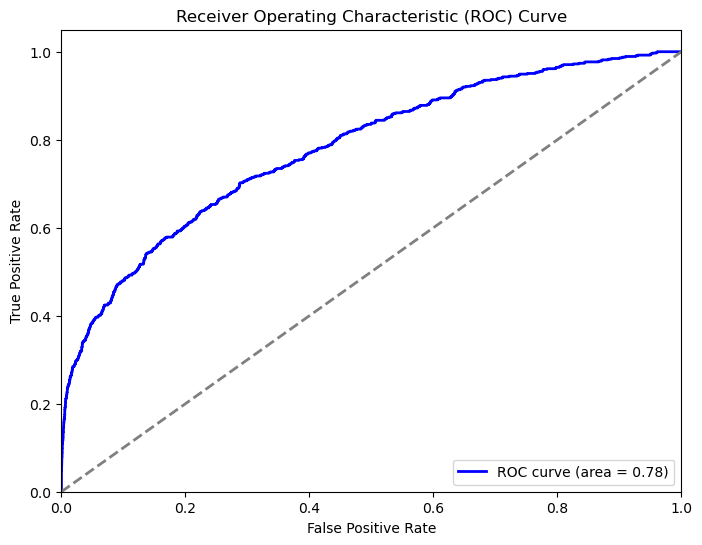

In [33]:
from sklearn.metrics import roc_curve, auc

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(yinb_test, best_bal_model.predict_proba(Xinb_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Evaluation on balanced data

In [373]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
accuracy_score(ybal_test, np.zeros_like(ybal_test)), roc_auc_score(ybal_test, np.zeros_like(ybal_test))

(0.5000069424195721, 0.5)

In [34]:
# Predicting on the test set
ybal_pred1 = best_bal_model.predict(Xbal_test)

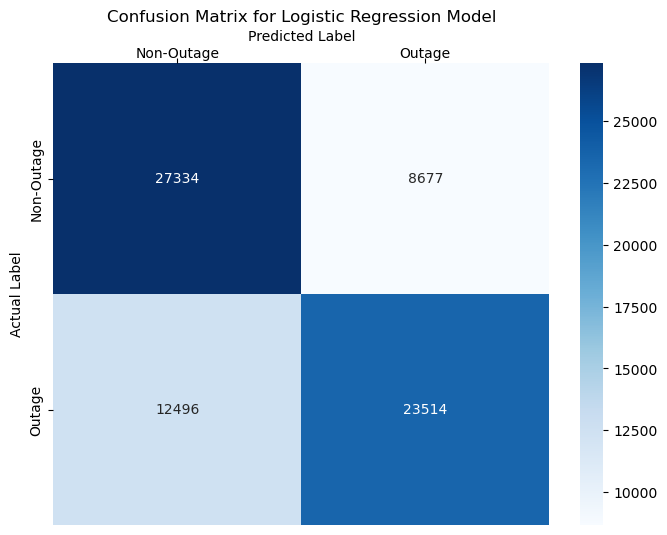

In [376]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ybal_test, ybal_pred1)

# Creating the confusion matrix with xticklabels on the top
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Outage', 'Outage'])
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Outage', 'Outage'], va='center', rotation=0)
# Placing the 'Non-Churn' and 'Churn' labels on the top
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Non-Outage', 'Outage'])

plt.show()


In [35]:
print (classification_report(ybal_test,ybal_pred1))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72     36011
           1       0.73      0.65      0.69     36010

    accuracy                           0.71     72021
   macro avg       0.71      0.71      0.71     72021
weighted avg       0.71      0.71      0.71     72021



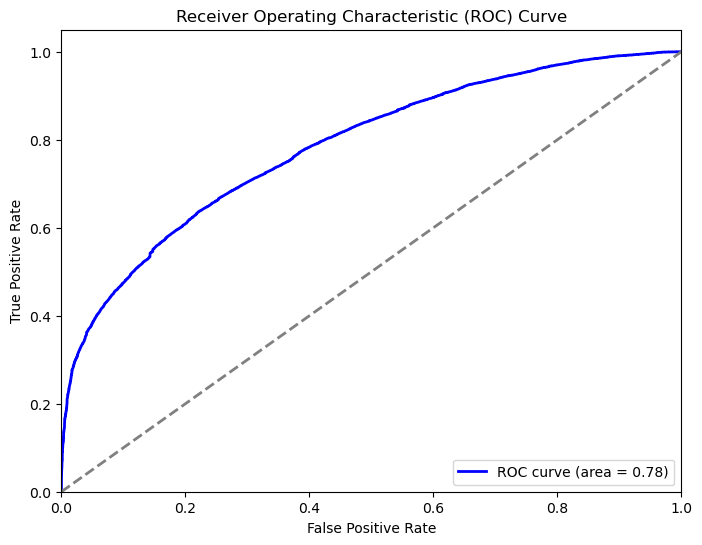

In [36]:
# Even though they have the same ROC AUC, their accuracy are really different. Explain why. 

from sklearn.metrics import roc_curve, auc

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ybal_test, best_bal_model.predict_proba(Xbal_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 2. Weighted logistic regression 

### Modeling 

We will keep the parameters obtained before but just change the class_weight parameter from None to balanced

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Creating a dictionary with hyperparameters and possible values
## for searching
tuned_parameters = [{"C": [0.01, 0.1, 1],
                     "class_weight":["balanced"],
                     "solver": ["sag", "liblinear"],
                     "max_iter":[10000]}]
## Configuring grid search
clf3 = GridSearchCV( LogisticRegression(),tuned_parameters,cv=5,scoring=gmean)
## fit the search with training set
clf3.fit(Xinb_train, yinb_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1], 'class_weight': ['balanced'],
                          'max_iter': [10000],
                          'solver': ['sag', 'liblinear']}],
             scoring=make_scorer(geometric_mean_score))

In [67]:
# Saving the model
import joblib
joblib.dump(clf3, "wlr_on_inb_data.joblib")

['wlr_on_inb_data.joblib']

In [87]:
clf3.best_score_

0.7131624733665862

In [88]:
clf3.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10000, 'solver': 'sag'}

In [89]:
best_wgt_model = clf3.best_estimator_

### Evaluation on imbalanced dataset 

In [90]:
# Predicting on the test set
ywgt_pred1 = best_wgt_model.predict(Xinb_test)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(yinb_test, ywgt_pred1)
print(conf_matrix)

[[27578  8432]
 [  229   419]]


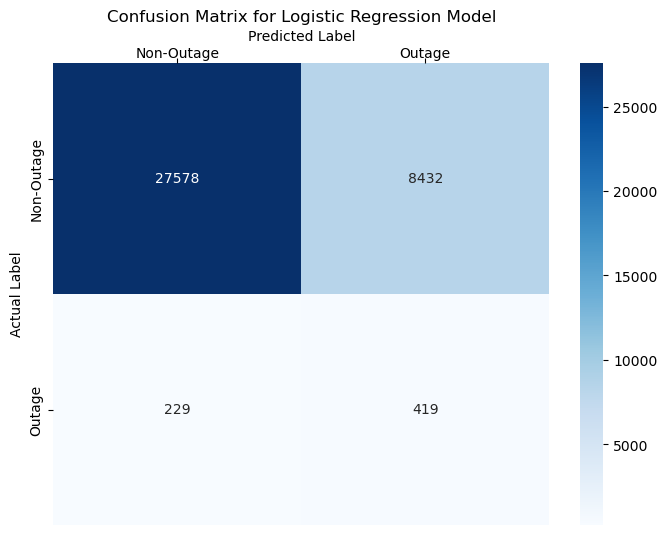

In [73]:

import seaborn as sns
import matplotlib.pyplot as plt


# Creating the confusion matrix with xticklabels on the top
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Outage', 'Outage'])
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Outage', 'Outage'], va='center', rotation=0)
# Placing the 'Non-Churn' and 'Churn' labels on the top
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Non-Outage', 'Outage'])

plt.show()


In [91]:
print(classification_report(yinb_test,ywgt_pred1))


              precision    recall  f1-score   support

           0       0.99      0.77      0.86     36010
           1       0.05      0.65      0.09       648

    accuracy                           0.76     36658
   macro avg       0.52      0.71      0.48     36658
weighted avg       0.98      0.76      0.85     36658



In [92]:
geometric_mean_score(yinb_test,ywgt_pred1)

0.7037028849464709

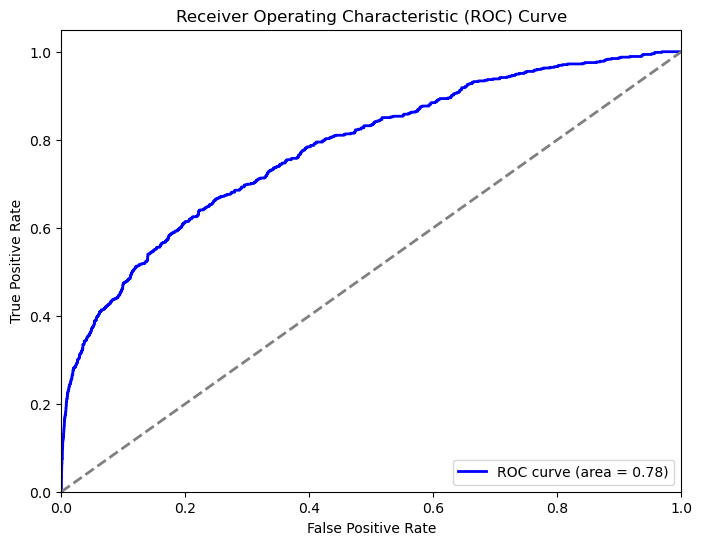

In [75]:
from sklearn.metrics import roc_curve, auc

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(yinb_test, best_wgt_model.predict_proba(Xinb_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [76]:
probs = best_wgt_model.predict_proba(Xinb_test)[:,1]
cust_pred = (probs >= 0.8).astype(int)
print(classification_report(yinb_test, cust_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     36010
           1       0.16      0.31      0.21       648

    accuracy                           0.96     36658
   macro avg       0.57      0.64      0.59     36658
weighted avg       0.97      0.96      0.96     36658



In [500]:
best_wgt_model.predict_proba(Xinb_test)

array([[0.80714763, 0.19285237],
       [0.73006711, 0.26993289],
       [0.39031334, 0.60968666],
       ...,
       [0.80440856, 0.19559144],
       [0.73019764, 0.26980236],
       [0.74094571, 0.25905429]])

### Evaluation on balanced dataset 

In [93]:
# Predicting on the test set
ywgt_pred2 = best_wgt_model.predict(Xbal_test)

In [393]:
from sklearn.metrics import classification_report, confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(ybal_test, ywgt_pred2)
print(conf_matrix)

[[32898  3113]
 [19775 16235]]


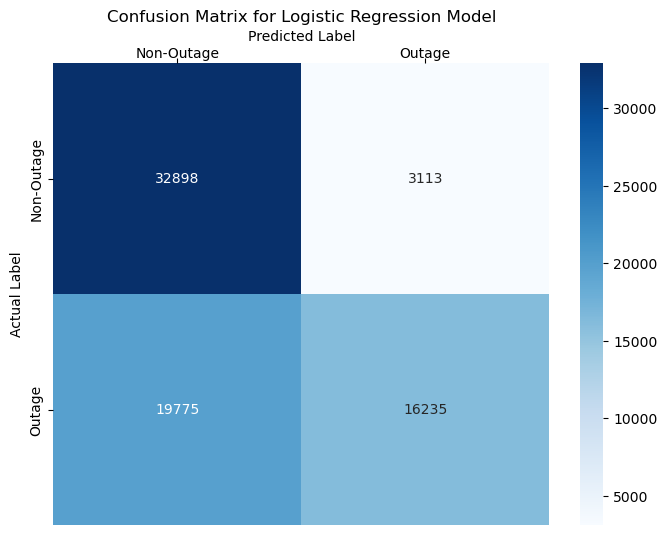

In [394]:

import seaborn as sns
import matplotlib.pyplot as plt


# Creating the confusion matrix with xticklabels on the top
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Outage', 'Outage'])
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Outage', 'Outage'], va='center', rotation=0)
# Placing the 'Non-Churn' and 'Churn' labels on the top
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Non-Outage', 'Outage'])

plt.show()


In [94]:
print(classification_report(ybal_test,ywgt_pred2))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74     36011
           1       0.84      0.45      0.59     36010

    accuracy                           0.68     72021
   macro avg       0.73      0.68      0.66     72021
weighted avg       0.73      0.68      0.66     72021



In [95]:
geometric_mean_score(ybal_test,ywgt_pred2)

0.6417441824197291

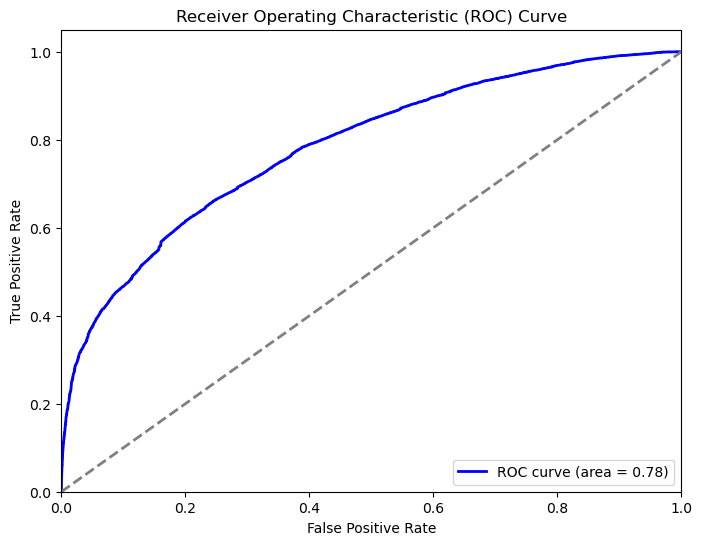

In [398]:
from sklearn.metrics import roc_curve, auc

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ybal_test, best_wgt_model.predict_proba(Xbal_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 3. Normal Logistic regression on the PCA + SMOTE data

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Creating a dictionary with hyperparameters and possible values
## for searching
tuned_parameters = [{"C": [0.01, 0.1, 1],
                     "solver": ["sag", "liblinear"],
                     "max_iter":[50000]}]
## Configuring grid search
clf4 = GridSearchCV(LogisticRegression(),tuned_parameters,cv=5,scoring="roc_auc")
## fit the search with training set
clf4.fit(Xpca_train, ypca_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1], 'max_iter': [50000],
                          'solver': ['sag', 'liblinear']}],
             scoring='roc_auc')

In [40]:
# Saving the model
import joblib
joblib.dump(clf4, "nlr_on_pca_data.joblib")

['nlr_on_pca_data.joblib']

In [41]:
clf4.best_params_

{'C': 0.1, 'max_iter': 50000, 'solver': 'sag'}

In [42]:
best_pca_model = clf4.best_estimator_

In [43]:
clf4.best_score_

0.7437628444443546

### Evaluation on balanced data

In [45]:
# Predicting on the imbalanced test set
pca_pred1 = best_pca_model.predict(Xpca_test)

In [444]:
from sklearn.metrics import classification_report, confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(ypca_test, pca_pred1)
print(conf_matrix)

[[26947  9064]
 [14184 21826]]


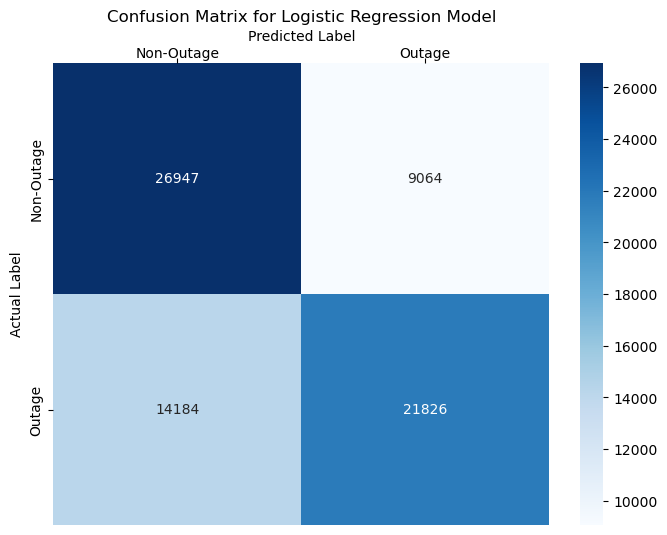

In [445]:

import seaborn as sns
import matplotlib.pyplot as plt


# Creating the confusion matrix with xticklabels on the top
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Outage', 'Outage'])
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Outage', 'Outage'], va='center', rotation=0)
# Placing the 'Non-Churn' and 'Churn' labels on the top
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Non-Outage', 'Outage'])

plt.show()


In [46]:
print (classification_report(ypca_test,pca_pred1))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70     36011
           1       0.71      0.61      0.65     36010

    accuracy                           0.68     72021
   macro avg       0.68      0.68      0.68     72021
weighted avg       0.68      0.68      0.68     72021



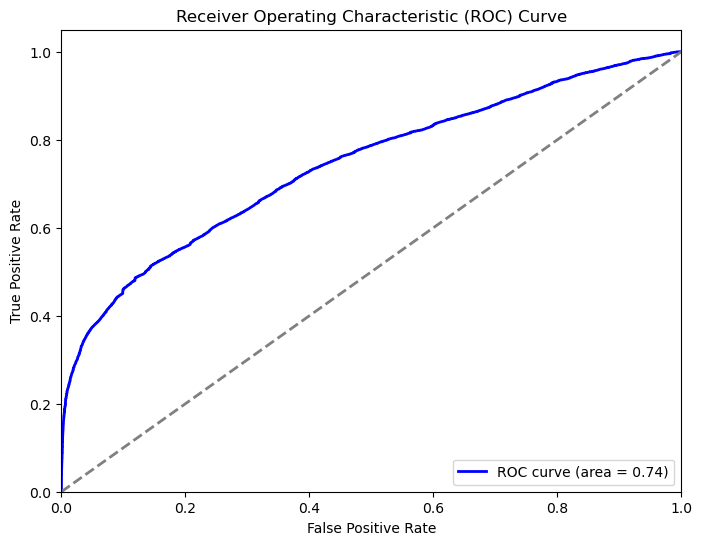

In [47]:
from sklearn.metrics import roc_curve, auc

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ypca_test, best_pca_model.predict_proba(Xpca_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Evaluation on imbalanced data

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Xinb_pca = pca.fit_transform(Xinb_test)
print(Xinb_pca.shape)

(36658, 3)


In [49]:
Xinb_pca = pd.DataFrame(Xinb_pca)
Xinb_pca

,0,1,2
0,-1.046446,0.131628,0.905939
1,-0.725781,1.165173,-0.572034
2,1.302783,-0.501478,0.948173
3,1.208947,-0.387158,-0.629495
4,-1.186049,-0.264474,0.475995
...,...,...,...
36653,-0.542010,2.538068,-0.765411
36654,0.248110,0.474914,0.278354
36655,0.123548,-0.274562,0.131910
36656,0.047430,0.878463,-0.164273


In [50]:
# Predicting on the imbalanced test set
pca_pred3 = best_pca_model.predict(Xinb_pca)

C:\Users\komen\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(yinb_test, pca_pred3)
print(conf_matrix)

[[ 5020 30990]
 [  174   474]]


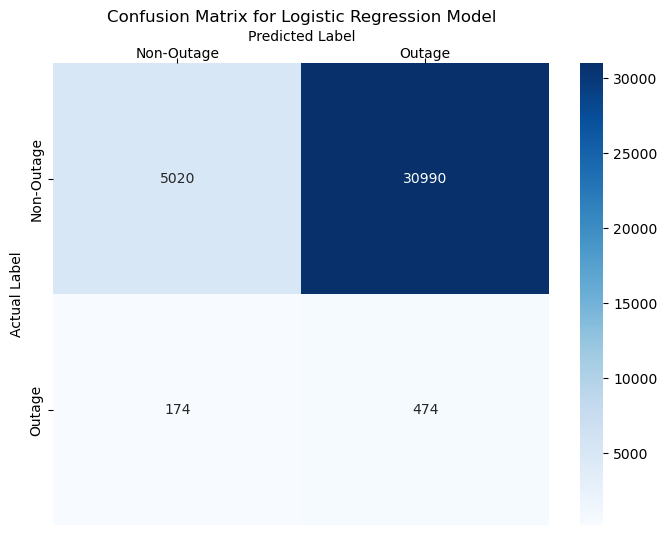

In [52]:

import seaborn as sns
import matplotlib.pyplot as plt


# Creating the confusion matrix with xticklabels on the top
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Outage', 'Outage'])
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Outage', 'Outage'], va='center', rotation=0)
# Placing the 'Non-Churn' and 'Churn' labels on the top
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Non-Outage', 'Outage'])

plt.show()


In [487]:
print (classification_report(yinb_test, pca_pred3))

              precision    recall  f1-score   support

           0       0.99      0.18      0.31     35963
           1       0.02      0.84      0.03       600

    accuracy                           0.19     36563
   macro avg       0.50      0.51      0.17     36563
weighted avg       0.97      0.19      0.30     36563



C:\Users\komen\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


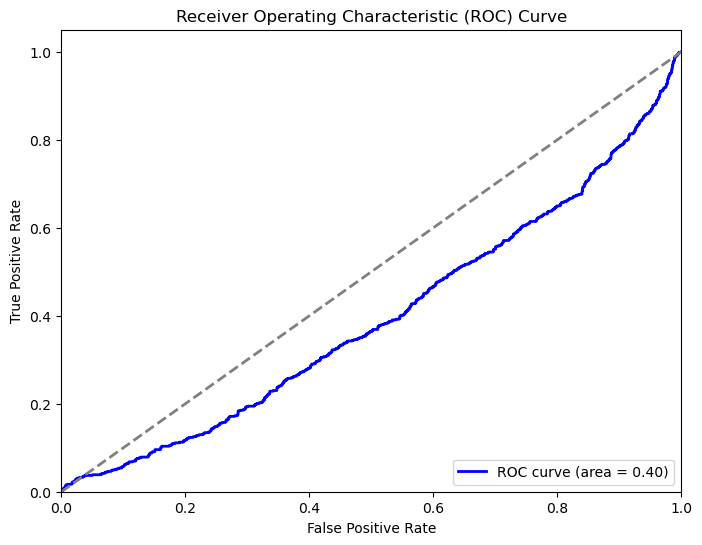

In [53]:
from sklearn.metrics import roc_curve, auc

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(yinb_test, best_pca_model.predict_proba(Xinb_pca)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
